## October 2024: END SEMESTER ASSESSMENT ESA  
### M.TECH DATA SCIENCE AND MACHINE LEARNING_ SEMESTER II

##	UE20CS931 - MACHINE LEARNING - II

### This dataset contains health-related information of individuals, including various health conditions, lifestyle choices, and demographic details. The dataset is designed to analyze and predict the likelihood of a brain stroke among individuals based on these factors.

### Objective:
- Build a machine learning model to predict if a person will suffer from Brain Stroke or not by using feature engineering and ensemble methods.

### Dataset Information:

- **Gender:** Gender of the individual.
- **Age:** Age of the individual.
- **Hyper Tension:**  0 if the patient doesn't have hypertension, 1 if the patient has hypertension.
- **Heart Disease:** 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease.
- **ever-married:** "No" or "Yes".
- **worktype:** Type of work("children", "Govtjob", "Neverworked", "Private" or "Self-employed").
- **Residencetype:** "Rural" or "Urban" residence.
- **avgglucoselevel:** average glucose level in blood.
- **bmi:** body mass index.
- **smoking_status:**  "formerly smoked", "never smoked", "smokes" or "Unknown"*.
- **stroke:** 1 if the patient had a stroke or 0 if not

### Import required Libraries and read the dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder

# splitting, scaling, and encoding
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# evaluation metrics
from sklearn import metrics
from sklearn.metrics import recall_score

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Package for handling imbalance data
#!pip install imblear
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Pipeline and transformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# To view all the columns
pd.set_option('display.max_columns', None)

## Section B (marks 40)

### 2(a).  Read the dataset and print the following (6 marks)
      
- Shape of the data (2 mark)
- Number of numerical and categorical variable (2 mark)
- Descriptive stats of numerical data and give inference (2 mark)


In [3]:
df = pd.read_csv('brain_stroke.csv')

In [5]:
df.shape

(4981, 11)

In [51]:
df_num = df.select_dtypes('number')
df_cat = df.select_dtypes('object')

print('Number of Numerical Fields : ',df_num.shape[1])
print('Number of categorical fields : ',df_cat.shape[1])

Number of Numerical Fields :  6
Number of categorical fields :  5


In [52]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


### 2 (b).Create visualizations to explore the relationships between different numerical features in the dataset using suitable plots and share your inferences for the same. (6 Marks)

<Figure size 2000x1000 with 0 Axes>

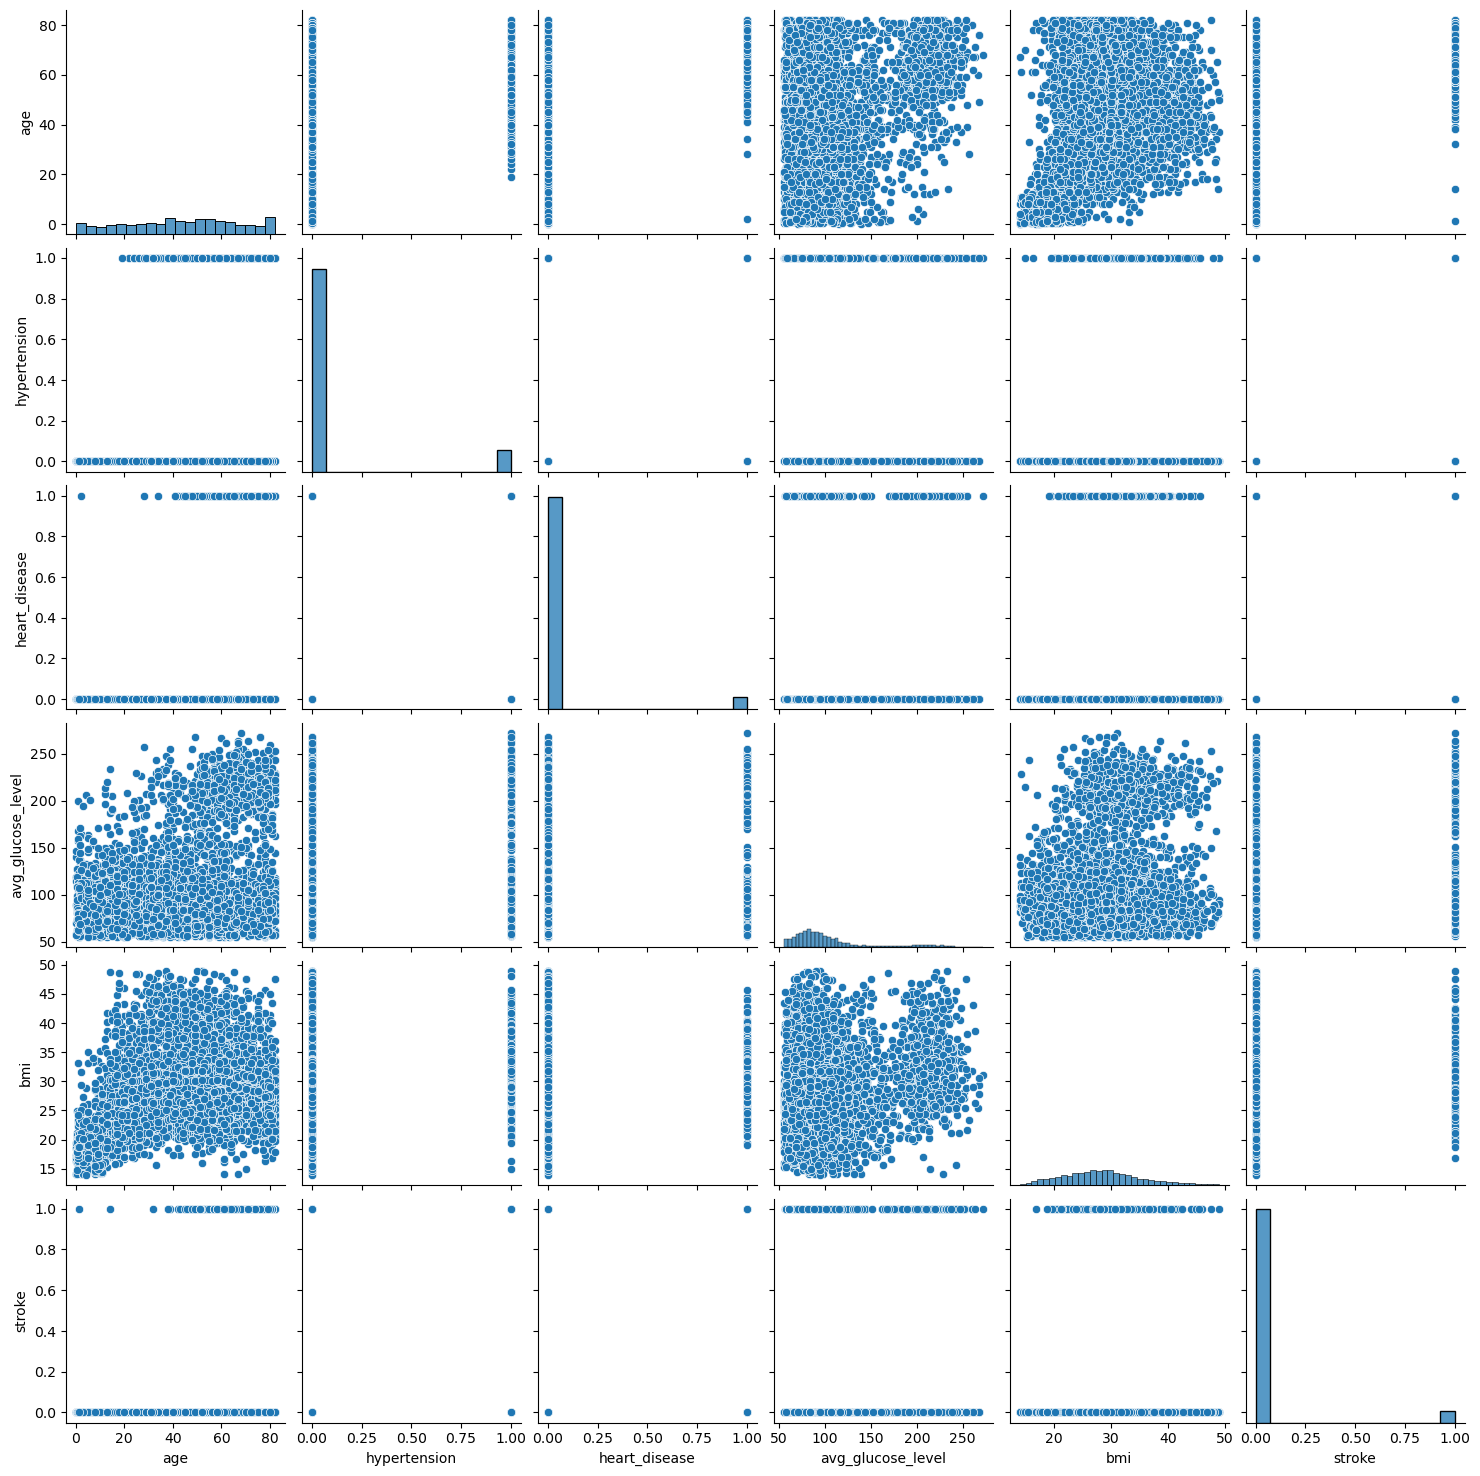

In [53]:
plt.figure(figsize=(20,10))
sns.pairplot(df_num)
plt.show()

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


### 2 (c).Check for the correlation between various numerical features and share your inferences accordingly. (8 Marks)

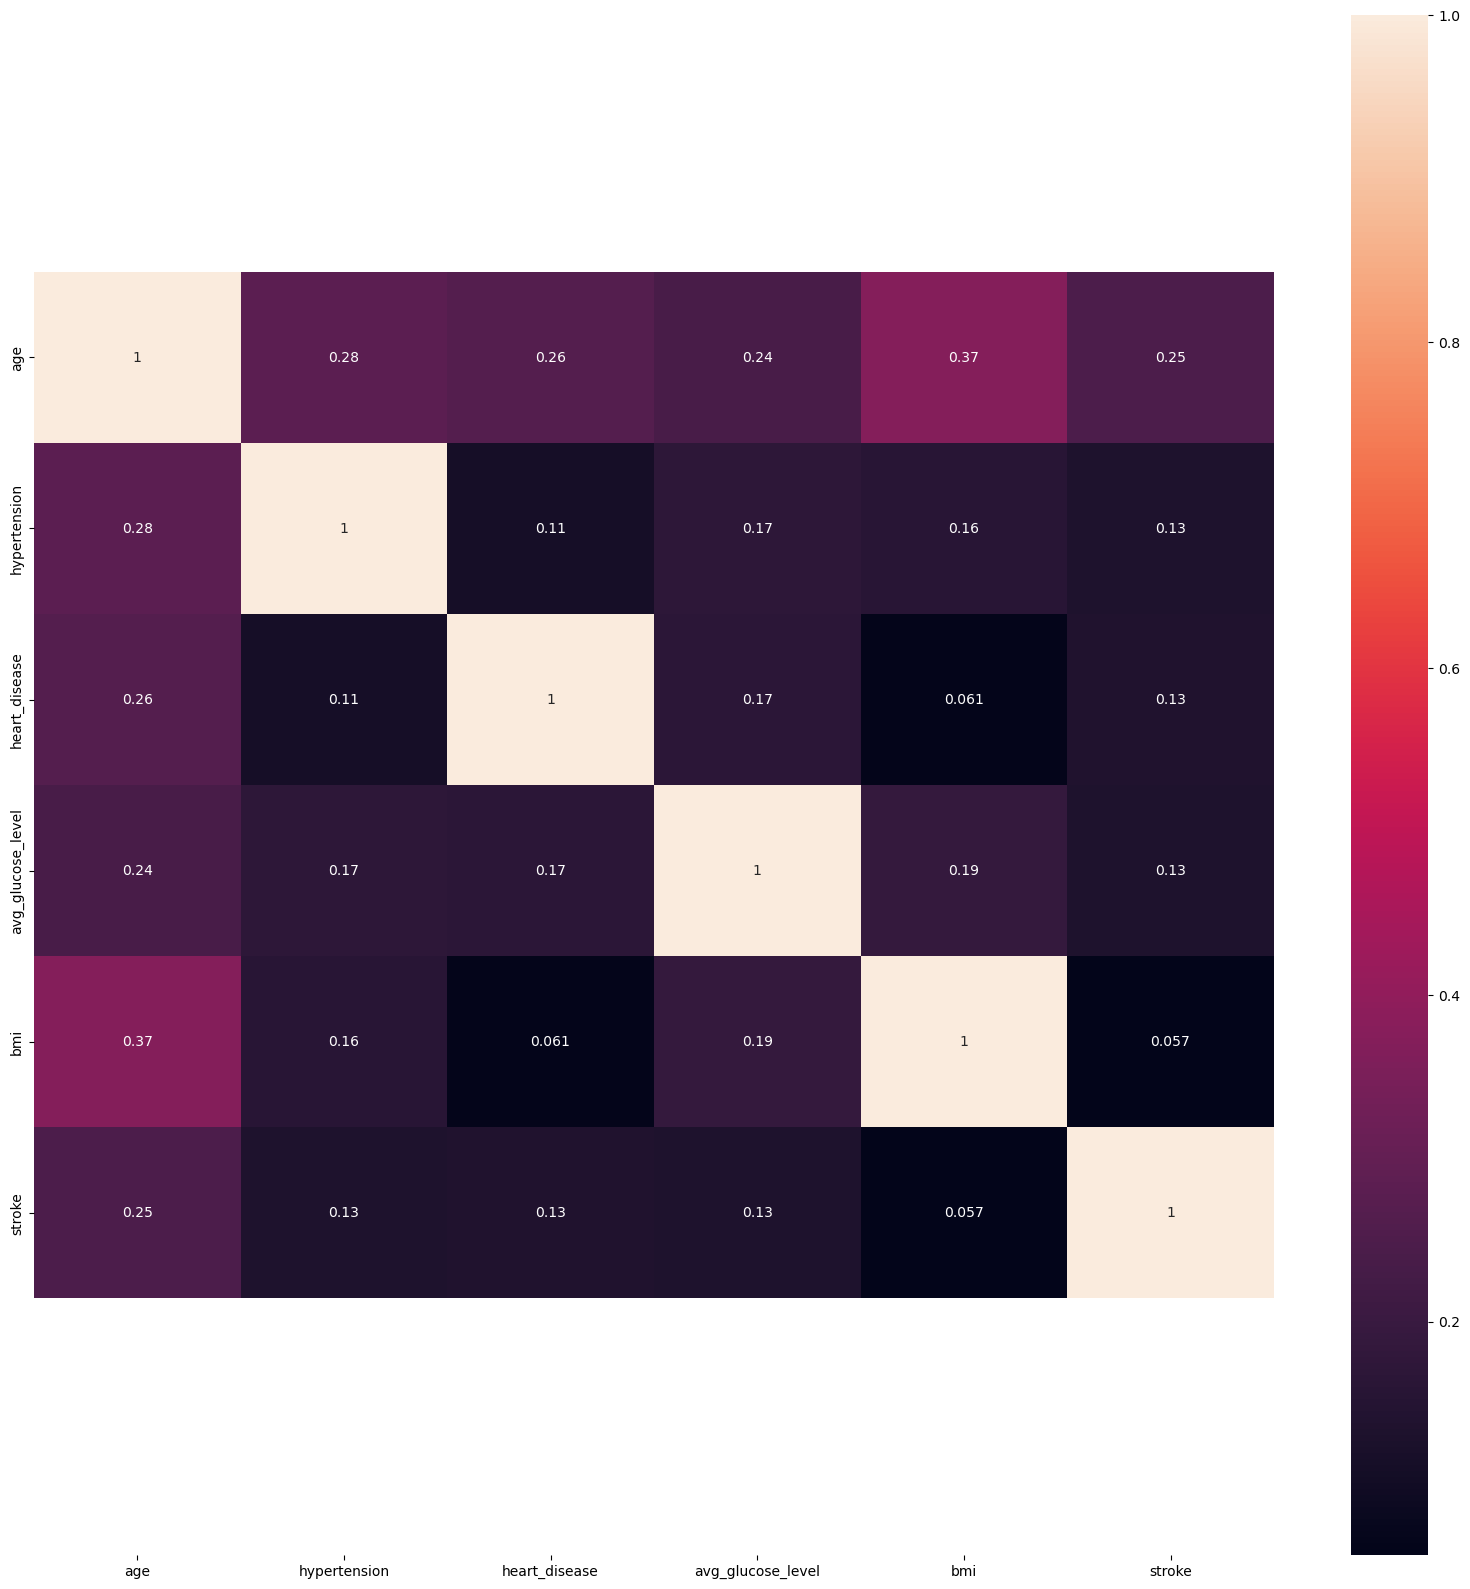

In [58]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.select_dtypes('number').corr(), annot = True )
top, bottom = ax.get_ylim()
ax.set_ylim(top + 1.5, bottom - 1.5 )
plt.show()

### 2 (d). Perform appropriate encoding on the categorical variables. (8 Marks)

In [59]:
unique = pd.DataFrame(columns=['Col Name','Unique Values'])
for col in df_cat.columns:
    unique.loc[len(unique)] = [col,df_cat[col].nunique()]
unique.head()

,Col Name,Unique Values
0,gender,2
1,ever_married,2
2,work_type,4
3,Residence_type,2
4,smoking_status,4


In [60]:
df_cat['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children'], dtype=object)

In [61]:
df_cat['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [62]:
df_label = pd.DataFrame()
le = LabelEncoder()
for col in df_cat.columns:
    df_label[col] = le.fit_transform(df_cat[col])

df_label

,gender,ever_married,work_type,Residence_type,smoking_status
0,1,1,1,1,1
1,1,1,1,0,2
2,0,1,1,1,3
3,0,1,2,0,2
4,1,1,1,1,1
...,...,...,...,...,...
4976,1,0,1,0,1
4977,1,1,1,1,3
4978,0,1,0,0,3
4979,1,1,1,0,3


### 2 (e). Perform the following steps on the dataset (5 marks):

- Check the distribution of the target column 'stroke', and comment on the class distribution (3 marks)
- Segregate the dependent and the independent features. (2 marks)

In [63]:
df['stroke'].value_counts()

stroke
0    4733
1     248
Name: count, dtype: int64

### 2 (f). Handle the imbalanced data using oversampling or undersampling approach, and check the distribution of the resampled target class. (5 marks)

In [50]:
smote = SMOTE(sampling_strategy='auto',random_state=42)

In [71]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [72]:
print(X_train_resampled.shape, y_train_resampled.shape)

(7580, 10) (7580,)


### 2 (g). Split the dataset into train and test data (80:20). (2 marks)

In [65]:
df_data = pd.concat([df_num,df_label],axis=1)
df_data

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,ever_married,work_type,Residence_type,smoking_status
0,67.0,0,1,228.69,36.6,1,1,1,1,1,1
1,80.0,0,1,105.92,32.5,1,1,1,1,0,2
2,49.0,0,0,171.23,34.4,1,0,1,1,1,3
3,79.0,1,0,174.12,24.0,1,0,1,2,0,2
4,81.0,0,0,186.21,29.0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,41.0,0,0,70.15,29.8,0,1,0,1,0,1
4977,40.0,0,0,191.15,31.1,0,1,1,1,1,3
4978,45.0,1,0,95.02,31.8,0,0,1,0,0,3
4979,40.0,0,0,83.94,30.0,0,1,1,1,0,3


In [69]:
X = df_data.drop(['stroke'],axis=1)
y = df_data['stroke']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [70]:
print(f'{0}\n{1}\n{2}\n{3}',X_train.shape, X_test.shape, y_train.shape, y_test.shape)

0
1
2
3 (3984, 10) (997, 10) (3984,) (997,)


## Section C (Marks 40)

### 3 (a). Make use of the imbalanced data and fit a Random forest classifier Model. Describe your observations based on output/results seen in the confusion matrix. (10 marks)

In [73]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [74]:
y_pred = rf.predict(X_test)

In [76]:
recall_score(y_test,y_pred)

0.0

In [77]:
from sklearn.metrics import confusion_matrix

In [78]:
cm = confusion_matrix(y_test,y_pred)

In [80]:
cm_disp = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

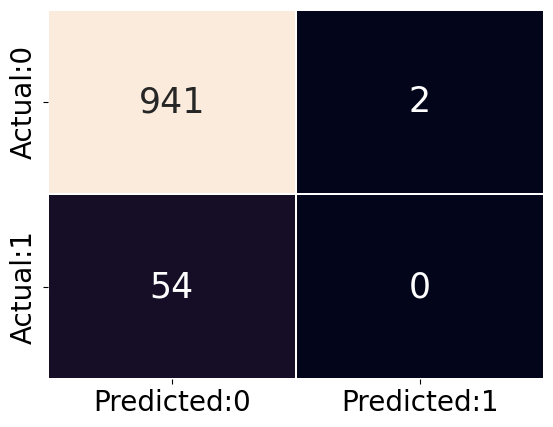

In [82]:
sns.heatmap(cm_disp, annot = True, fmt = 'd',  cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25}) #cmap = ListedColormap(['lightskyblue']),

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

### 3 (b). Make use of the balanced data and fit a Random forest classifier Model and a Decision Tree Classifier model. Describe your observations based on output/results seen in the confusion matrix. (20 marks)

#### For all the models built below we will follow the below flow:
- Build a base model using the balanced data
- Select K features using Wrapper or Embedded Methods
- Perform hyperparameter tuning on all the models to tune the hyperparameters and find the best hyperparameters.
- Scale the data using the StandardScaler() method and build a models using the K selected feature and the hyperparameters, and compute it's accuracy and Recall.

### 3 (c). Collectively compare the performance of all the models and find the best-performing model. (5 marks)

### 3 (d) From a business perspective answer the following: (5 Marks)
- a. Which data will you choose Balanced or Imbalanced and why? (2.5 Marks)
- b. Based on the given problem statement, explain which metric should be considered from the confusion matrix to gauge the effectiveness of the model built. (2.5 marks)


### Happy Learning:)